In [63]:
import cv2
import numpy as np
from google.colab import drive
import os
drive.mount('/content/gdrive')
from google.colab.patches import cv2_imshow
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
objp = np.zeros((48,3), np.float32)
objp[:,:2] = (np.mgrid[0:8,0:6].T.reshape(-1,2))

In [65]:
print(np.mgrid[0:8,0:6]) # 8x6  = 48
np.mgrid[0:8,0:6].T.reshape(-1,2)

[[[0 0 0 0 0 0]
  [1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]
  [7 7 7 7 7 7]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]


array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5],
       [6, 5],
       [7, 5]])

In [66]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

['IMG_0004.JPG', 'IMG_0015.JPG', 'IMG_0012.JPG', 'IMG_0011.JPG', 'IMG_0014.JPG', 'IMG_0016.JPG', 'IMG_0009.JPG', 'IMG_0003.JPG', 'IMG_0006.JPG', 'IMG_0002.JPG', 'IMG_0013.JPG', 'IMG_0017.JPG', 'IMG_0005.JPG', 'IMG_0007.JPG', 'IMG_0008.JPG', 'IMG_0010.JPG']
/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0004.JPG
(777, 518)
IMG_0004.JPG


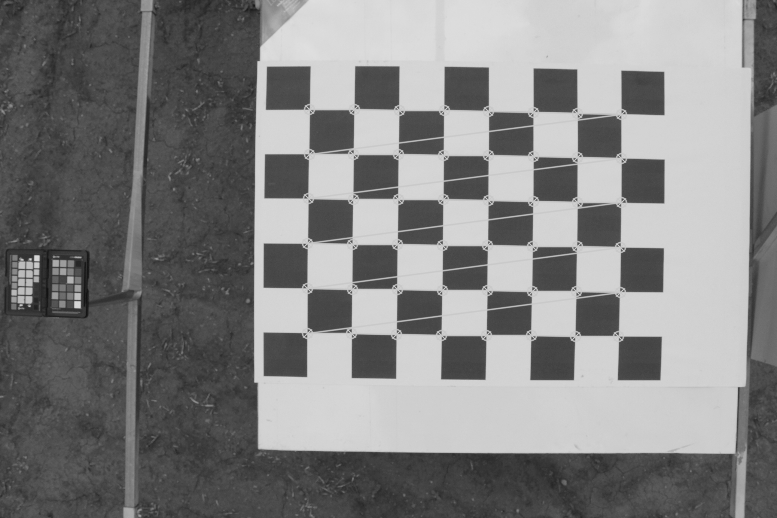

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0015.JPG
(777, 518)
IMG_0015.JPG
/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0012.JPG
(777, 518)
IMG_0012.JPG


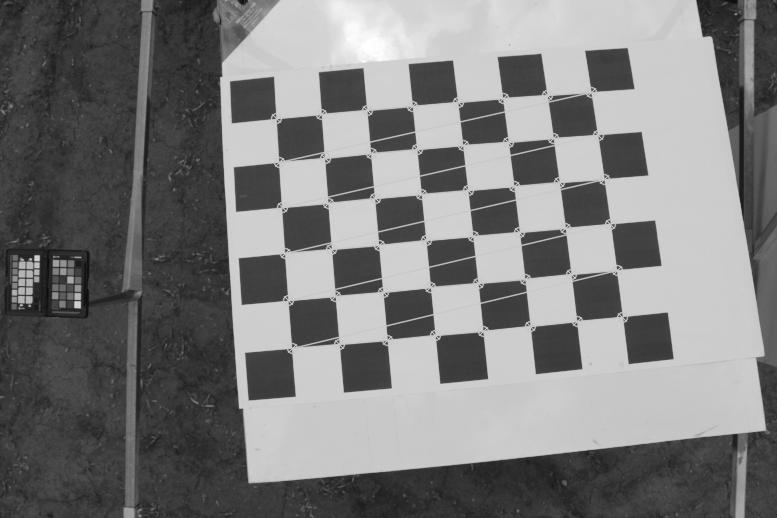

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0011.JPG
(777, 518)
IMG_0011.JPG


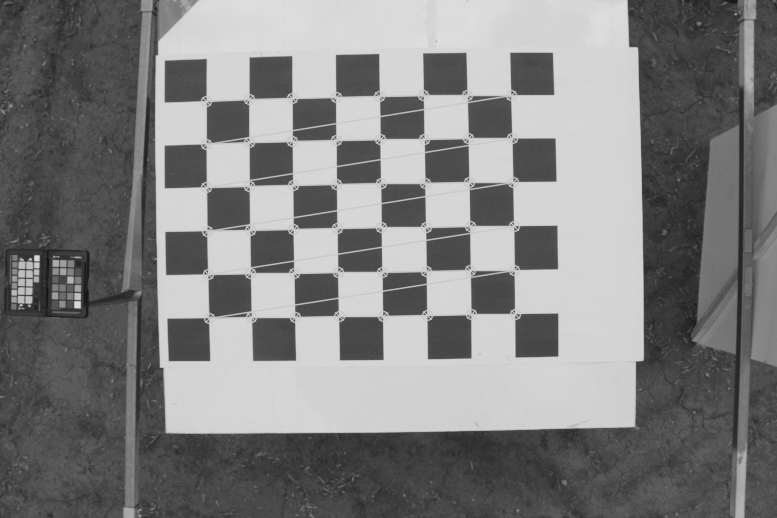

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0014.JPG
(777, 518)
IMG_0014.JPG
/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0016.JPG
(777, 518)
IMG_0016.JPG
/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0009.JPG
(777, 518)
IMG_0009.JPG


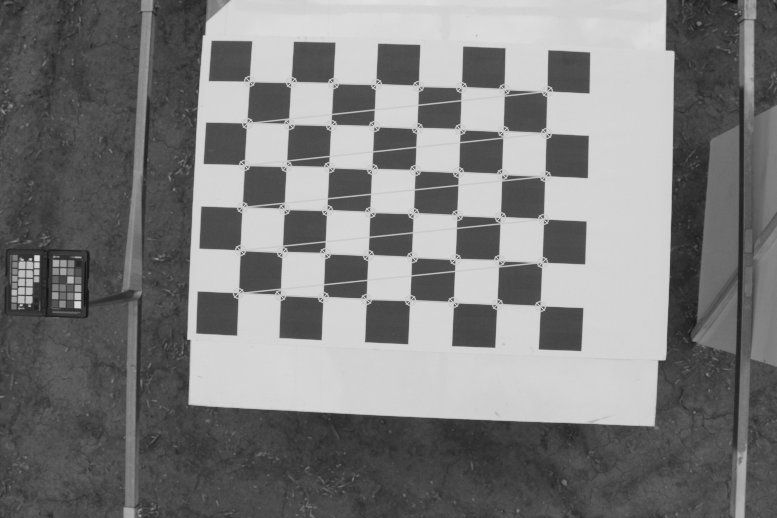

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0003.JPG
(777, 518)
IMG_0003.JPG


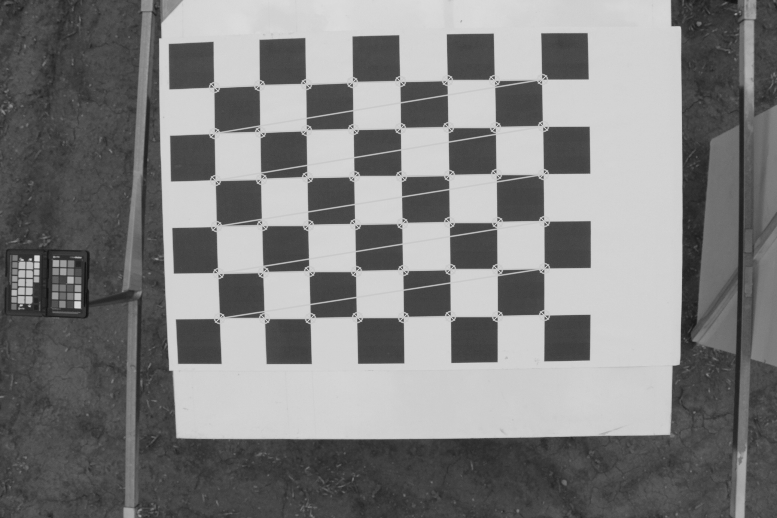

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0006.JPG
(777, 518)
IMG_0006.JPG


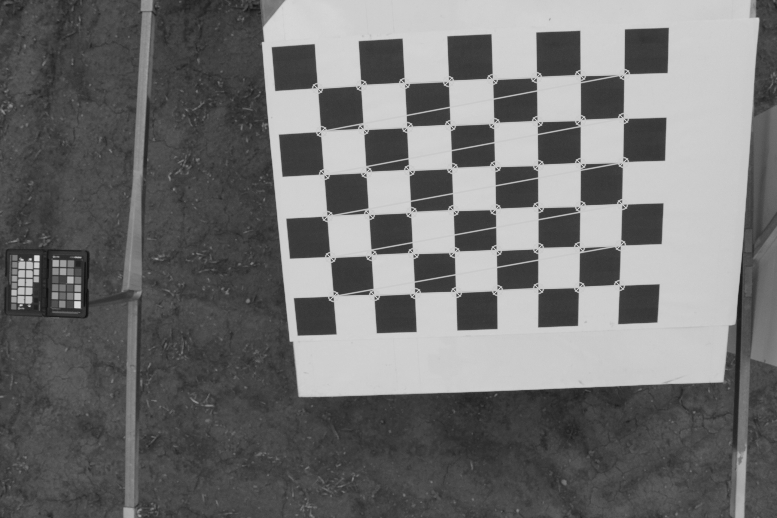

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0002.JPG
(777, 518)
IMG_0002.JPG


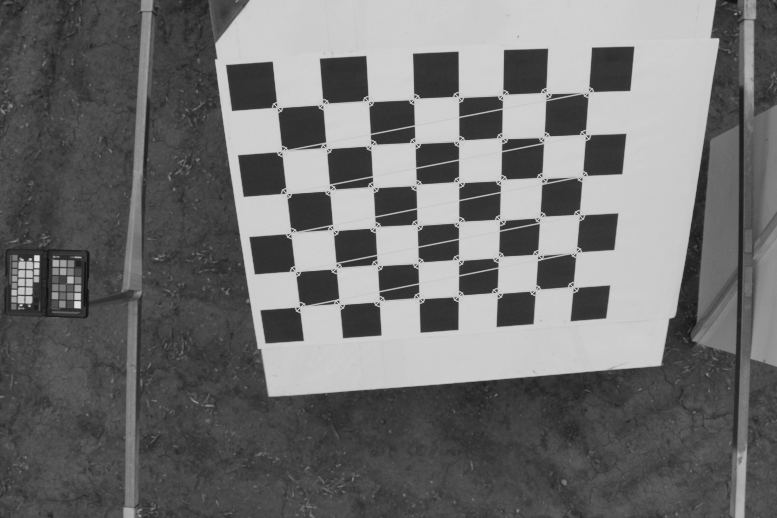

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0013.JPG
(777, 518)
IMG_0013.JPG


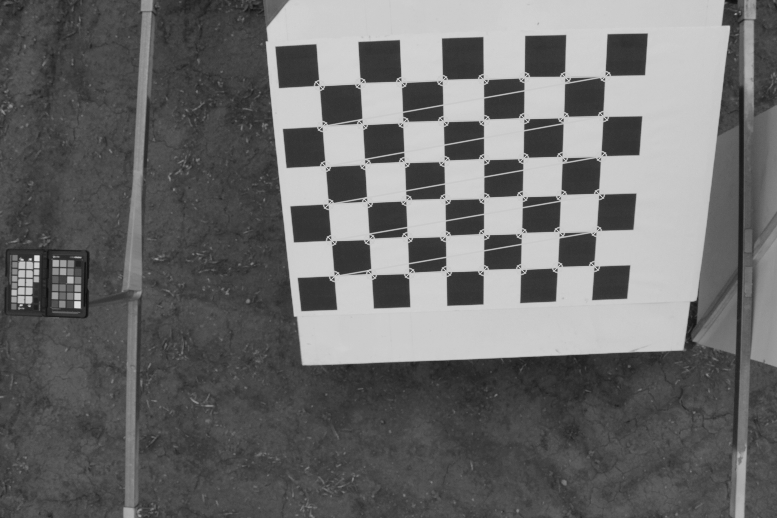

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0017.JPG
(777, 518)
IMG_0017.JPG


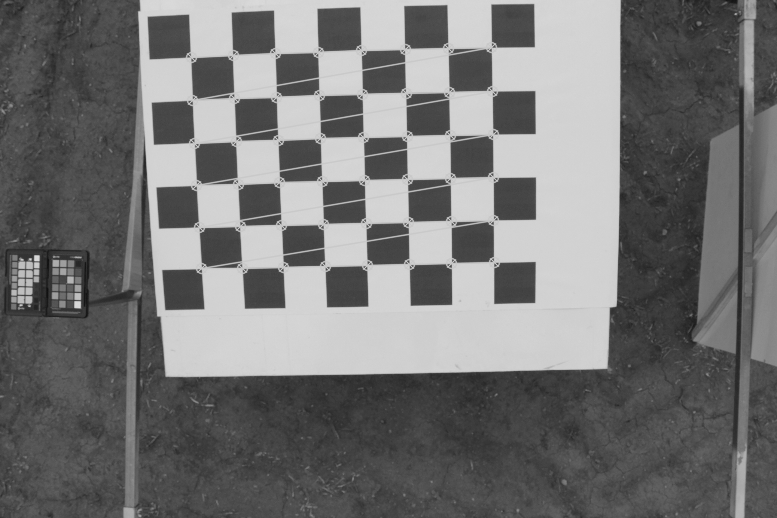

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0005.JPG
(777, 518)
IMG_0005.JPG


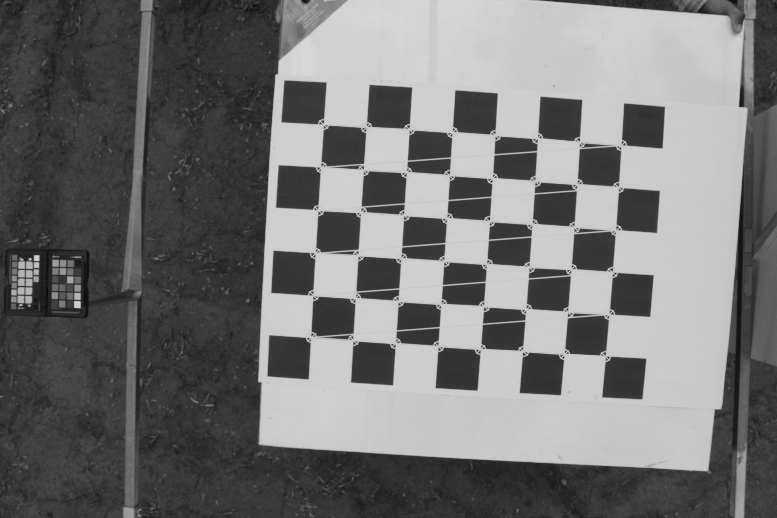

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0007.JPG
(777, 518)
IMG_0007.JPG


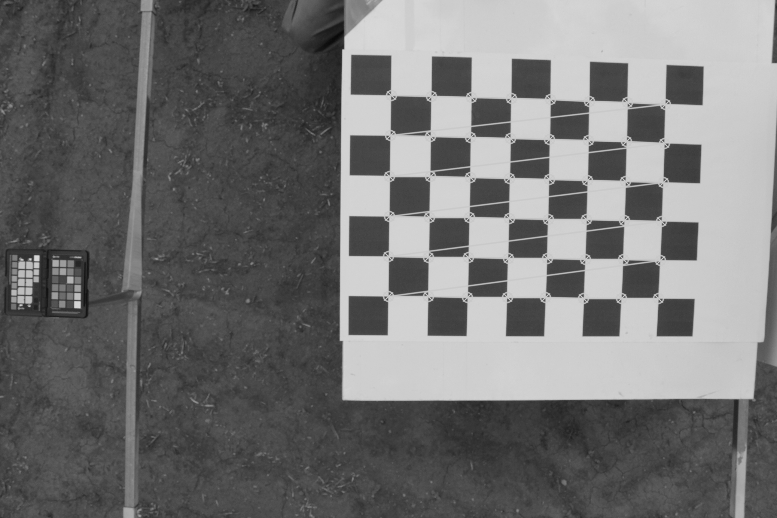

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0008.JPG
(777, 518)
IMG_0008.JPG


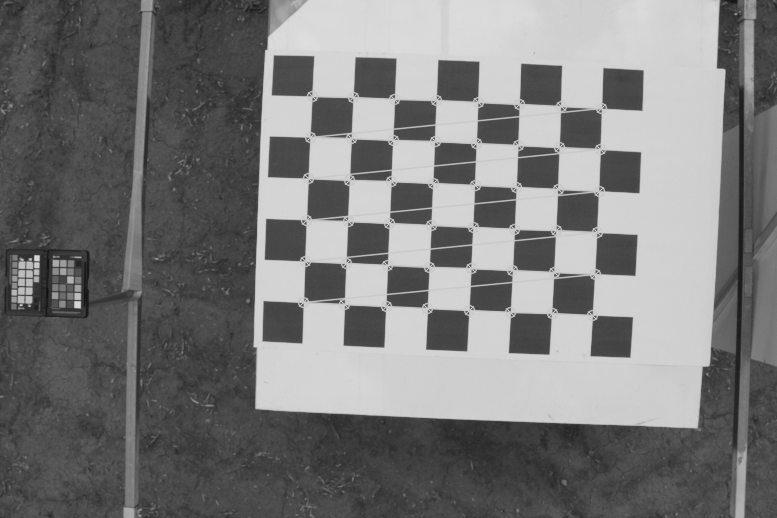

/content/gdrive/My Drive/CV_Lab_6_images/cam1/IMG_0010.JPG
(777, 518)
IMG_0010.JPG


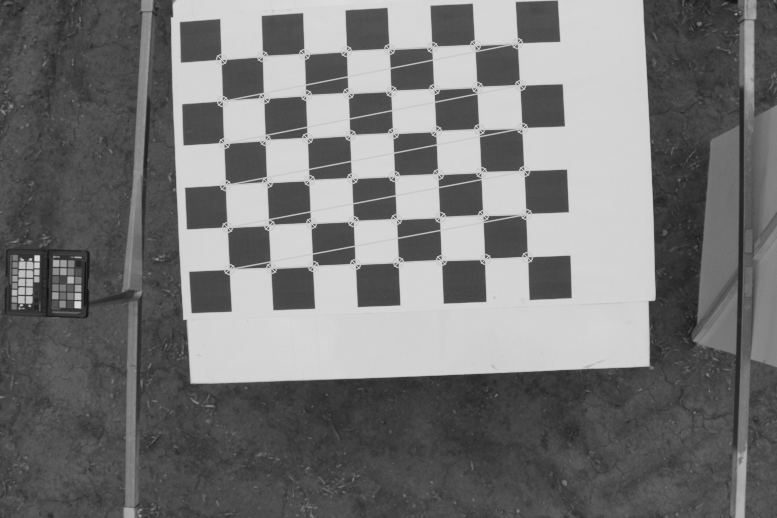

In [67]:
imgpoints_l = [] 
path = "/content/gdrive/My Drive/CV_Lab_6_images/cam1/"
files = os.listdir(path);
print(files)
i=0
for fname in files:
  print(path+fname)  
  img = cv2.imread(path + fname)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  scale_percent = 15 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  print(dim)
  gray = cv2.resize(gray,dim)

  ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
  print(fname);

  if ret == True:
        #objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints_l.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(gray, (8,6), corners2,ret)
        cv2_imshow(img)
        

In [68]:
len(imgpoints_l)

13

(777, 518)
IMG_0004.JPG


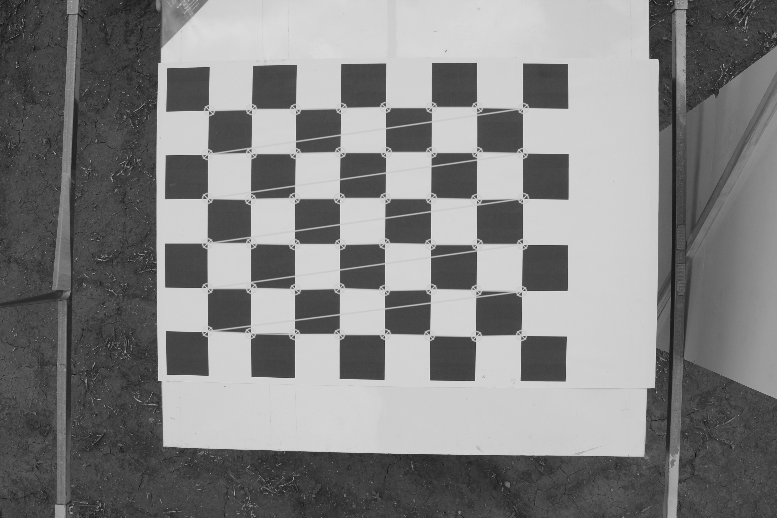

(777, 518)
IMG_0015.JPG
(777, 518)
IMG_0012.JPG


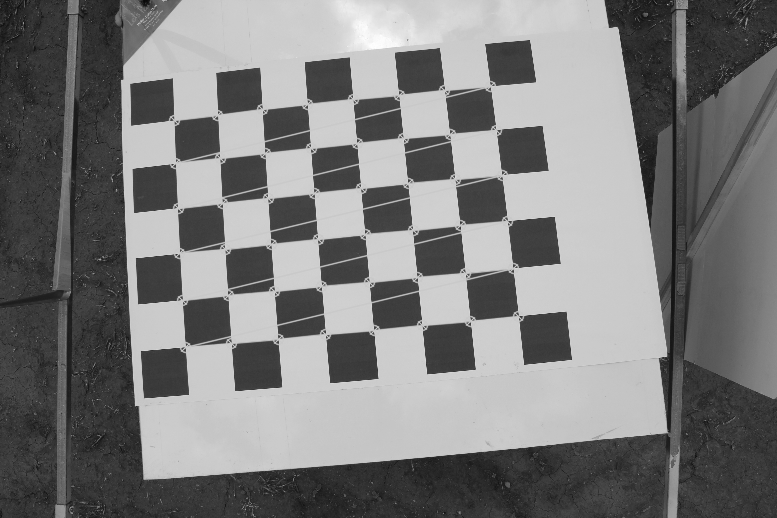

(777, 518)
IMG_0011.JPG


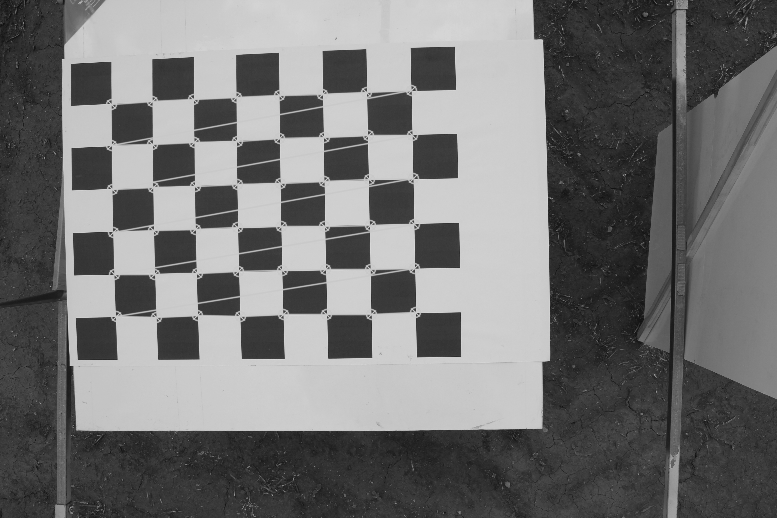

(777, 518)
IMG_0014.JPG
(777, 518)
IMG_0016.JPG
(777, 518)
IMG_0009.JPG


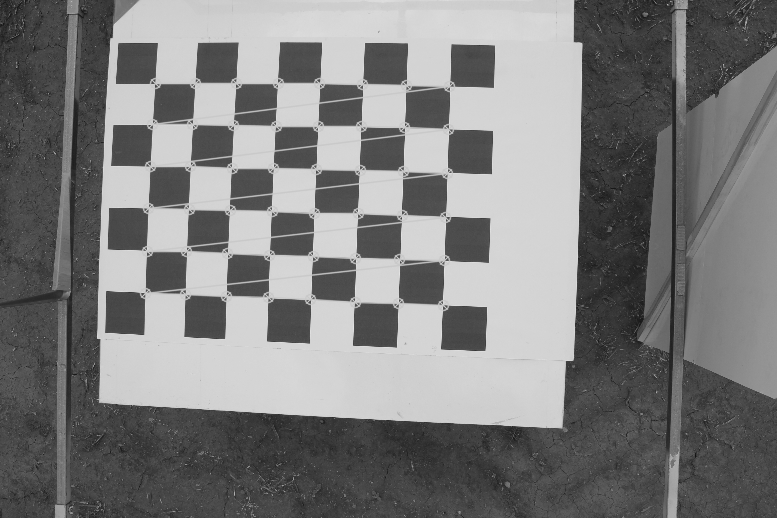

(777, 518)
IMG_0003.JPG


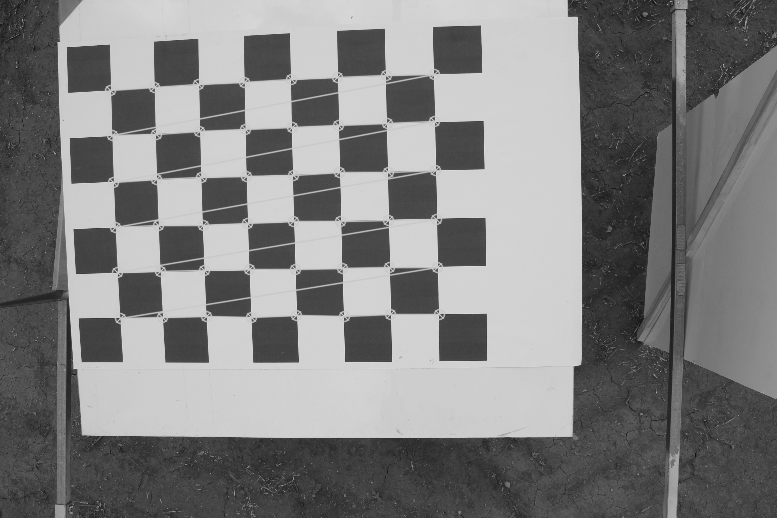

(777, 518)
IMG_0006.JPG


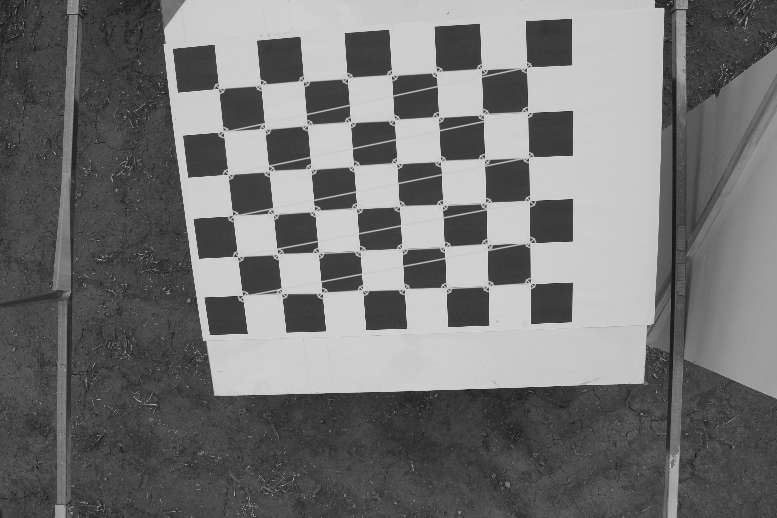

(777, 518)
IMG_0002.JPG


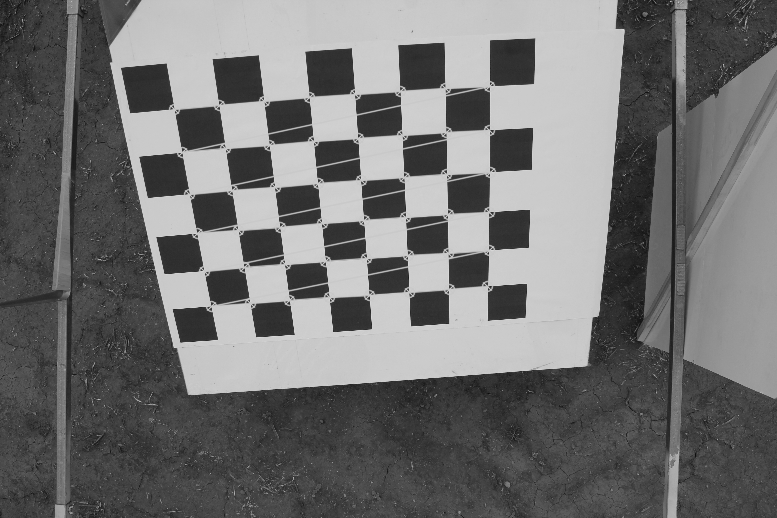

(777, 518)
IMG_0013.JPG


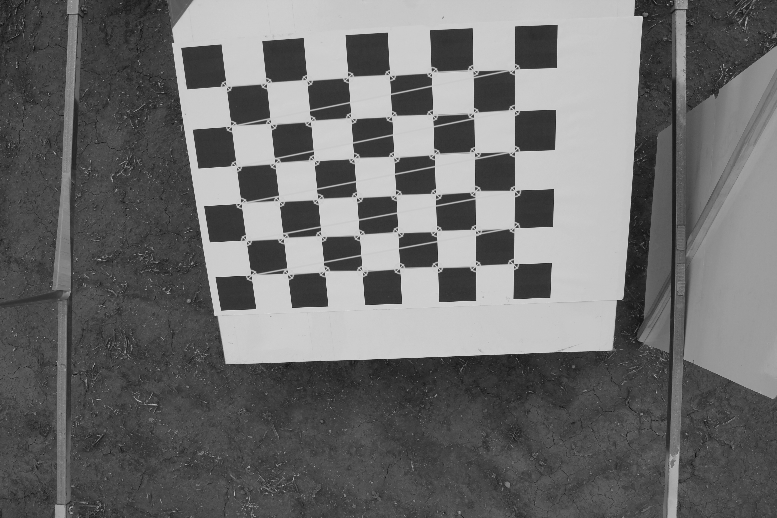

(777, 518)
IMG_0017.JPG


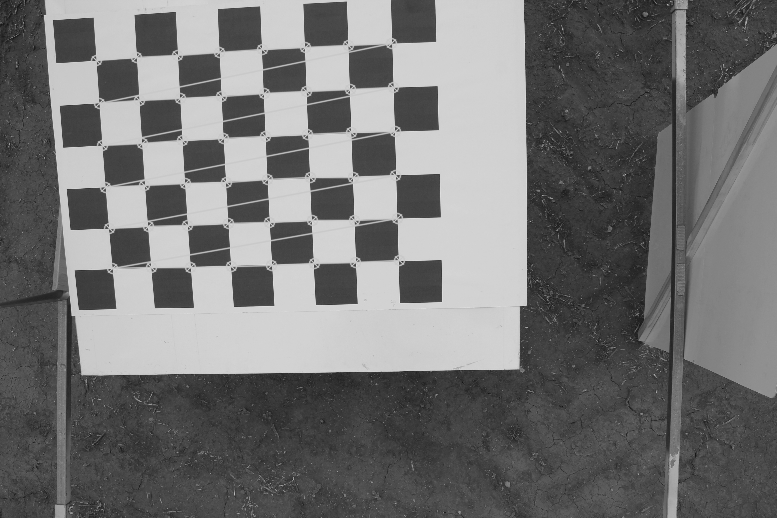

(777, 518)
IMG_0005.JPG


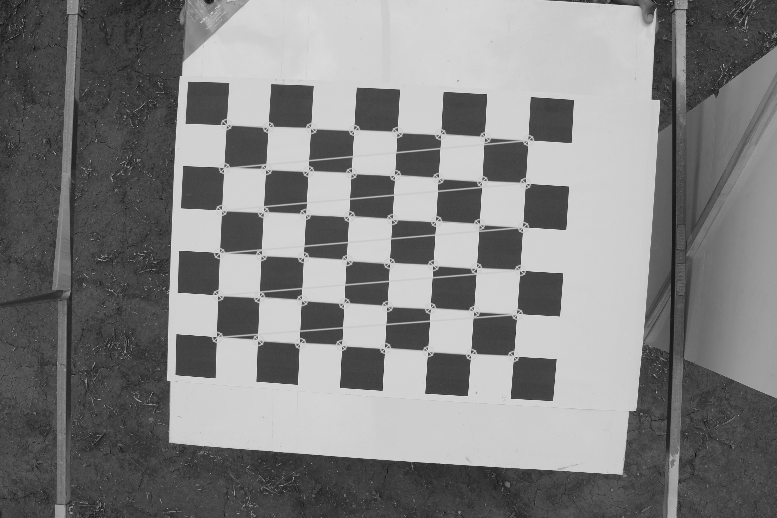

(777, 518)
IMG_0007.JPG


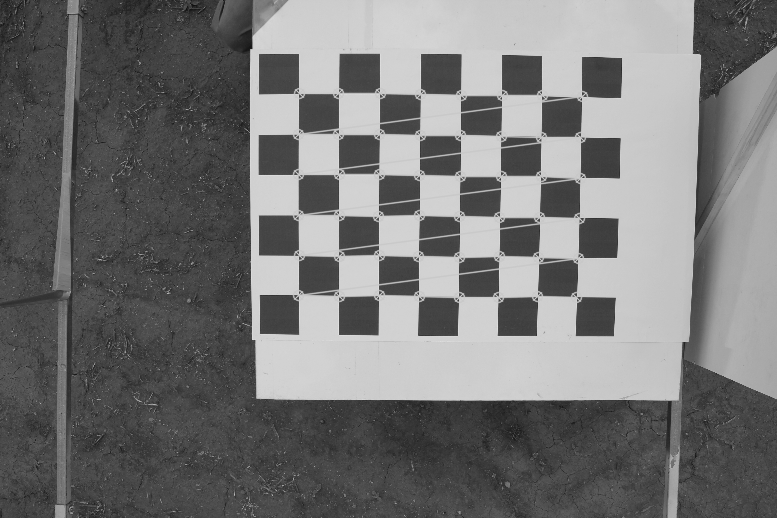

(777, 518)
IMG_0008.JPG


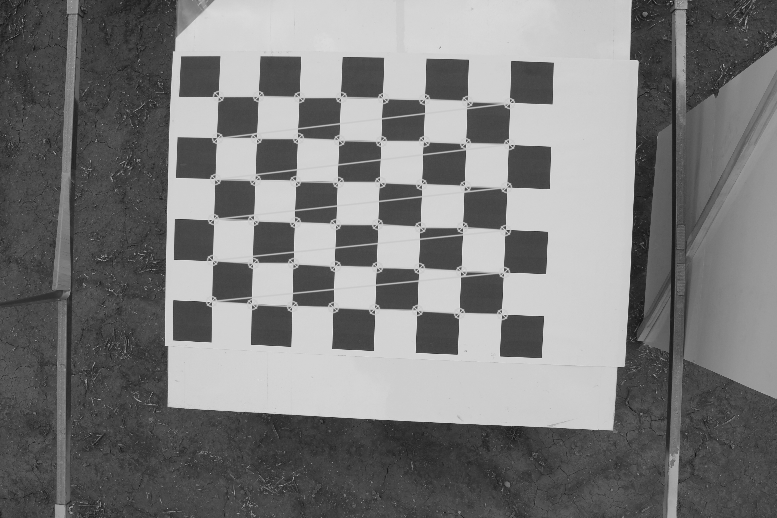

(777, 518)
IMG_0010.JPG


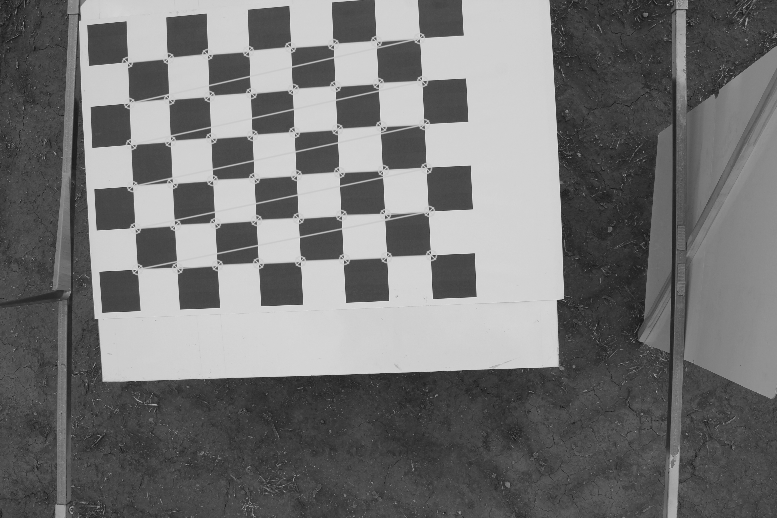

In [69]:
imgpoints_r = [] 
objpoints = [] 
path = "/content/gdrive/My Drive/CV_Lab_6_images/cam2/"
files = os.listdir(path);
i=0
for fname in files:
  img = cv2.imread(path + fname)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  scale_percent = 15 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  print(dim)
  gray = cv2.resize(gray,dim)

  ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

  print(fname);
  
  if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints_r.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(gray, (8,6), corners2,ret)
        cv2_imshow(img)

In [70]:
len(imgpoints_r), len(objpoints)

(13, 13)

In [71]:
gray.shape[::-1], gray.shape # (1000, 666) # By shhbr

((777, 518), (518, 777))

In [0]:
retl, mtxl, distl, rvecsl, tvecsl = cv2.calibrateCamera(objpoints, imgpoints_l, (1000, 666),None,None)
retr, mtxr, distr, rvecsr, tvecsr = cv2.calibrateCamera(objpoints, imgpoints_r, (1000, 666),None,None)

In [0]:
ret,mtx1,dist1,mtx2,dist2,R,T,E,F = cv2.stereoCalibrate(objpoints,imgpoints_l,imgpoints_r,mtxl,distl,mtxr,distr,(1000,666))#,mtxl,distl,mtxr,distr)

In [74]:
F

array([[-6.81355890e-07,  8.84062511e-05, -1.74095269e-02],
       [-4.52908138e-05, -2.08749044e-05, -9.98610537e-01],
       [ 1.27214852e-03,  1.00621060e+00,  1.00000000e+00]])

In [75]:
mtxl

array([[642.99727658,   0.        , 395.8727451 ],
       [  0.        , 642.62360653, 260.98296348],
       [  0.        ,   0.        ,   1.        ]])

In [76]:
mtx2

array([[651.66549632,   0.        , 385.10240304],
       [  0.        , 651.34654492, 269.01392249],
       [  0.        ,   0.        ,   1.        ]])

In [77]:
dist2

array([[-0.17540443,  0.19949499,  0.00203109,  0.00099309, -0.07553272]])

In [78]:
T

array([[-2.41582106],
       [-0.0145197 ],
       [ 0.134328  ]])

In [79]:
E

array([[ 1.03722137e-03, -1.34501758e-01, -1.27685133e-02],
       [ 6.89120158e-02,  3.17436503e-02,  2.41836285e+00],
       [ 2.61026967e-02, -2.41551477e+00,  3.17689585e-02]])

In [80]:
R

array([[ 0.99962238,  0.00514618,  0.02699291],
       [-0.00479691,  0.99990414, -0.01298814],
       [-0.02705716,  0.01285376,  0.99955124]])